## Illustration of a parabola as a loss function

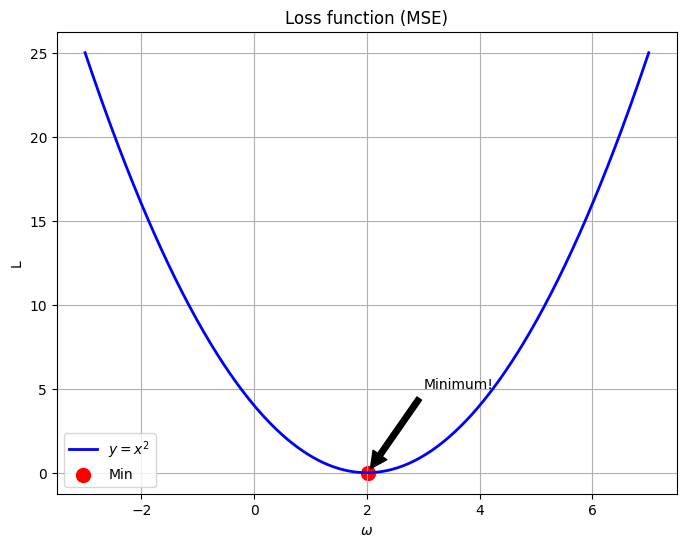

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = np.linspace(-3, 7, 400)
y = (x-2)**2

# Min value and its index
min_y = np.min(y)
min_index = np.argmin(y)
min_x = x[min_index]

# Graph
plt.figure(figsize=(8, 6))

plt.plot(x, y, label='$y = x^2$', color='b', linewidth=2)
plt.scatter(min_x, min_y, color='red', s=100, label='Min')

plt.title('Loss function (MSE)')
plt.xlabel(r'$\omega$')
plt.ylabel('L')
plt.grid(True)
plt.legend()

plt.annotate('Minimum!', xy=(min_x, min_y), xytext=(min_x + 1, min_y + 5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


## Regularization - impact on MSE

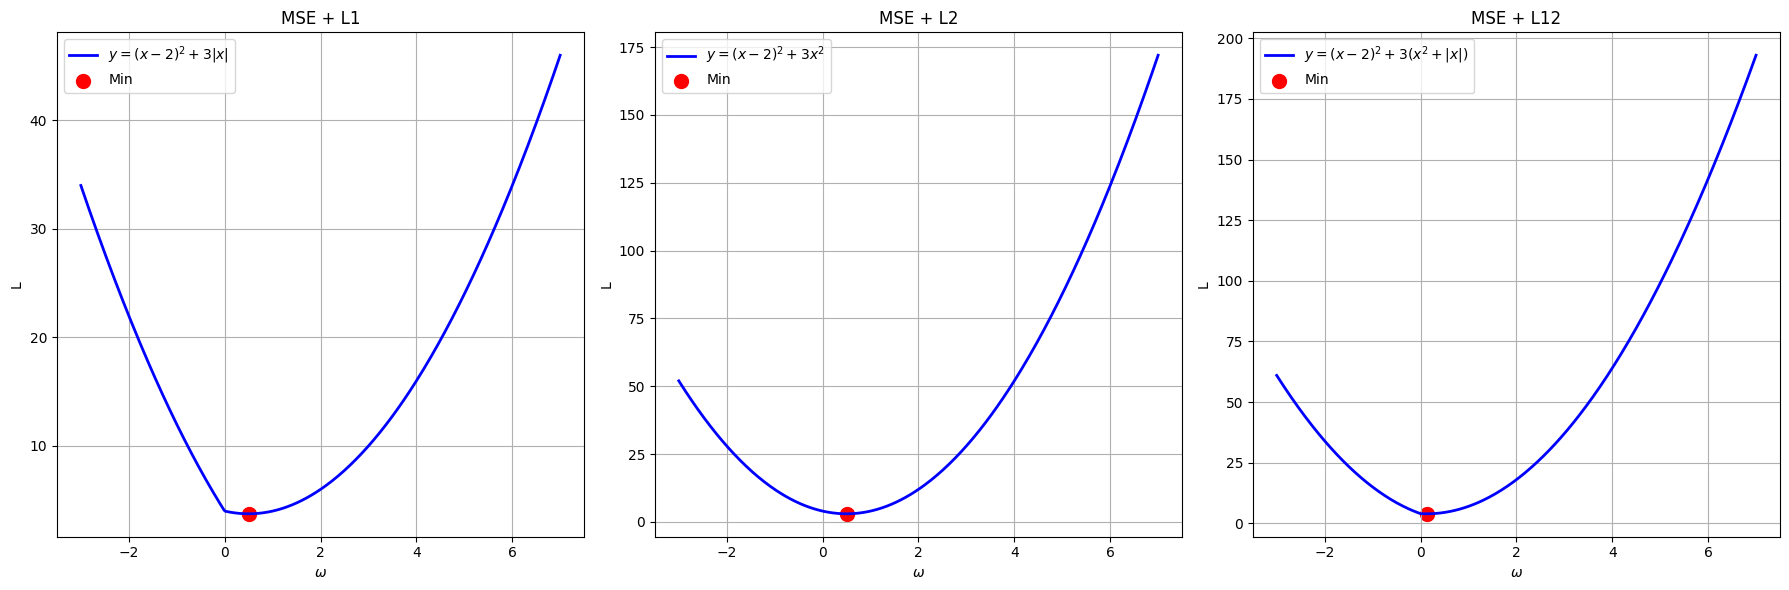

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Create data for parabolas
x = np.linspace(-3, 7, 400)
y_mse = (x - 2)**2
y_mse_l1 = y_mse + 3 * np.abs(x)
y_mse_l2 = y_mse + 3 * x**2
y_mse_l12 = y_mse + 3 * x**2 + 3 * np.abs(x)

# Min value and its index
min_y_mse = np.min(y_mse)
min_index_mse = np.argmin(y_mse)
min_x_mse = x[min_index_mse]
min_y_mse_l12 = np.min(y_mse_l12)
min_index_mse_l12 = np.argmin(y_mse_l12)
min_x_mse_l12 = x[min_index_mse_l12]

min_y_mse_l1 = np.min(y_mse_l1)
min_index_mse_l1 = np.argmin(y_mse_l1)
min_x_mse_l1 = x[min_index_mse_l1]

min_y_mse_l2 = np.min(y_mse_l2)
min_index_mse_l2 = np.argmin(y_mse_l2)
min_x_mse_l2 = x[min_index_mse_l2]

# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot MSE + L1
axes[0].plot(x, y_mse_l1, label='$y = (x-2)^2 + 3|x|$', color='b', linewidth=2)
axes[0].scatter(min_x_mse_l1, min_y_mse_l1, color='red', s=100, label='Min')
axes[0].set_title('MSE + L1')
axes[0].set_xlabel(r'$\omega$')
axes[0].set_ylabel('L')
axes[0].grid(True)
axes[0].legend()

# Plot MSE + L2
axes[1].plot(x, y_mse_l2, label='$y = (x-2)^2 + 3x^2$', color='b', linewidth=2)
axes[1].scatter(min_x_mse_l2, min_y_mse_l2, color='red', s=100, label='Min')
axes[1].set_title('MSE + L2')
axes[1].set_xlabel(r'$\omega$')
axes[1].set_ylabel('L')
axes[1].grid(True)
axes[1].legend()

# Plot MSE + L12
axes[2].plot(x, y_mse_l12, label=r'$y = (x-2)^2 + 3(x^2 + |x|)$', color='b', linewidth=2)
axes[2].scatter(min_x_mse_l12, min_y_mse_l12, color='red', s=100, label='Min')
axes[2].set_title('MSE + L12')
axes[2].set_xlabel(r'$\omega$')
axes[2].set_ylabel('L')
axes[2].grid(True)
axes[2].legend()

plt.tight_layout()
plt.show()


<ipython-input-14-66a30dc0a2f0>:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


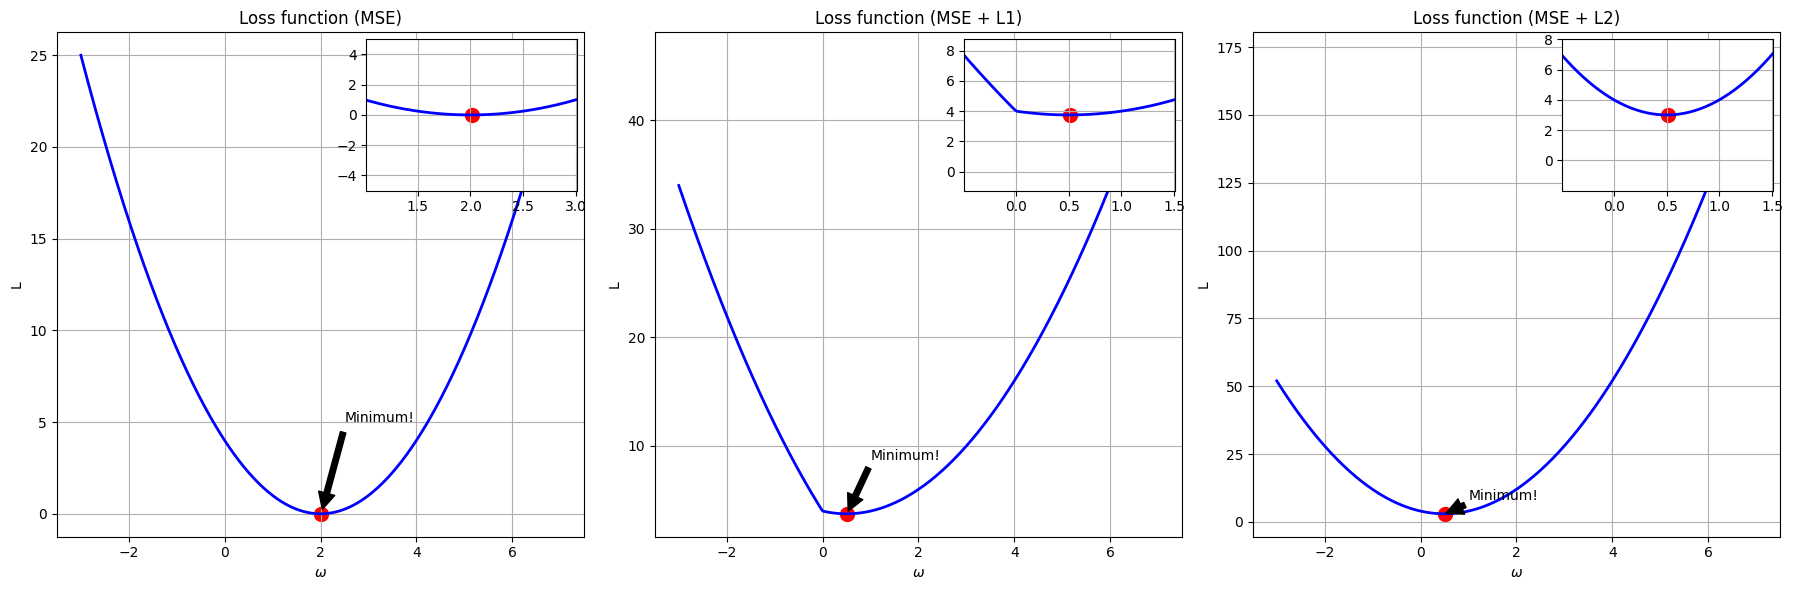

In [14]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Function for adding an inset
def add_inset(ax, x, y, min_x, min_y, title):
    ax.plot(x, y, color='b', linewidth=2)
    ax.scatter(min_x, min_y, color='red', s=100)
    ax.set_title(title)
    ax.set_xlabel(r'$\omega$')
    ax.set_ylabel('L')
    ax.grid(True)
    ax.annotate('Minimum!', xy=(min_x, min_y), xytext=(min_x + 0.5, min_y + 5),
                arrowprops=dict(facecolor='black', shrink=0.05))

    # Zoomed inset
    inset_ax = inset_axes(ax, width="40%", height="30%", loc='upper right')
    inset_ax.plot(x, y, color='b', linewidth=2)
    inset_ax.scatter(min_x, min_y, color='red', s=100)
    inset_ax.set_xlim(min_x - 1, min_x + 1)
    inset_ax.set_ylim(min_y - 5, min_y + 5)
    inset_ax.grid(True)

# Plot MSE
add_inset(axes[0], x, y_mse, min_x_mse, min_y_mse, 'Loss function (MSE)')

# Plot MSE + L1
add_inset(axes[1], x, y_mse_l1, min_x_mse_l1, min_y_mse_l1, 'Loss function (MSE + L1)')

# Plot MSE + L2
add_inset(axes[2], x, y_mse_l2, min_x_mse_l2, min_y_mse_l2, 'Loss function (MSE + L2)')

plt.tight_layout()
plt.show()


## Animation L1 L2

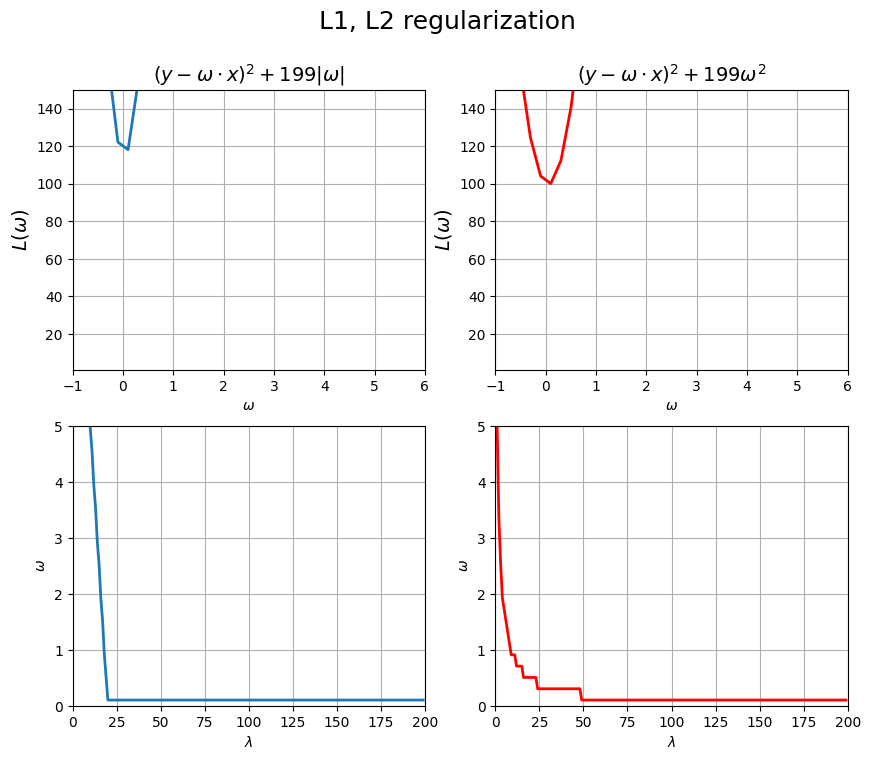

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('L1, L2 regularization', fontsize=18)
axs[0,0].set_xlim((-1, 6))
axs[0,0].set_ylim((1, 150))
axs[0,1].set_xlim((-1, 6))
axs[0,1].set_ylim((1, 150))
axs[1,0].set_xlim((0, 200))
axs[1,0].set_ylim((0, 5))
axs[1,1].set_xlim((0, 200))
axs[1,1].set_ylim((0, 5))
line1, = axs[0,0].plot([], [], lw=2)
line2, = axs[0,1].plot([], [], lw=2,color='r')
line3, = axs[1,0].plot([], [], lw=2,)
line4, = axs[1,1].plot([], [], lw=2,color='r')
line = [line1, line2, line3, line4]

# Initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    return line1, line2, line3, line4

# Animation function. This is called sequentially
def animate_l(i):
    x = np.linspace(-10, 10, 100)
    y1 = i * np.abs(x) + (x - 10)**2
    line1.set_data(x, y1)
    axs[0,0].set_title(r'$(y - \omega \cdot x)^2 + {} |\omega|$'.format(i), fontsize=14)
    axs[0,0].set_xlabel(r'$\omega$')
    axs[0, 0].set_ylabel(r'$L(\omega)$', fontsize=14)
    min_index1 = np.argmin(y1)
    w1 = x[min_index1]
    y2 = i * x**2 + (x - 10)**2
    line2.set_data(x, y2)
    axs[0,1].set_title(r'$(y - \omega \cdot x)^2 + {} \omega^2$'.format(i), fontsize=14)
    axs[0,1].set_xlabel(r'$\omega$')
    axs[0,1].set_ylabel(r'$L(\omega)$', fontsize=14)
    min_index2 = np.argmin(y2)
    w2 = x[min_index2]

    # Append new points to line3 and line4
    line3.set_xdata(np.append(line3.get_xdata(), i))
    line3.set_ydata(np.append(line3.get_ydata(), w1))

    line4.set_xdata(np.append(line4.get_xdata(), i))
    line4.set_ydata(np.append(line4.get_ydata(), w2))
    axs[1,0].set_ylabel(r'$\omega$')
    axs[1,0].set_xlabel(r'$\lambda$')
    axs[1,1].set_ylabel(r'$\omega$')
    axs[1,1].set_xlabel(r'$\lambda$')
    axs[0,0].grid(visible=True)
    axs[0,1].grid(visible=True)
    axs[1,0].grid(visible=True)
    axs[1,1].grid(visible=True)
    return line1, line2, line3, line4


# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate_l, init_func=init,
                               frames=200, interval=20, blit=True)

anim.save('animation_l12.gif', dpi=80, writer='imagemagick')

#To have a look at this animation, you should download saved file!
